### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import itertools
%matplotlib inline

In [ ]:
#!pip install git+https://github.com/gbolmier/funk-svd

In [ ]:
from funk_svd.dataset import fetch_ml_ratings
from funk_svd import SVD
from sklearn.metrics import mean_absolute_error

### Loading Dataset

In [ ]:
root_folder='/home/thummala/DS503ADA/git/Assignments/Assignment2-CollabFiltering'

In [ ]:
test_df = pd.read_csv(root_folder+'/Test_set.csv')
test_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,20001,99.00,6.60,99.0,99.00,99.00,99.00,99.0,99.00,99.00,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
1,20002,99.00,99.00,99.0,99.00,99.00,99.00,99.0,-2.48,99.00,...,-0.49,-7.18,99.00,-9.17,99.0,-7.96,99.0,3.50,99.00,7.96
2,20003,99.00,99.00,99.0,99.00,99.00,-1.60,99.0,8.64,99.00,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
3,20004,99.00,5.00,99.0,99.00,99.00,99.00,99.0,99.00,99.00,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
4,20005,99.00,99.00,99.0,99.00,-0.05,99.00,99.0,99.00,99.00,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,21996,3.59,0.92,99.0,99.00,99.00,99.00,99.0,99.00,-4.22,...,99.00,2.86,6.70,-3.30,99.0,99.00,99.0,4.61,4.37,99.00
1996,21997,99.00,99.00,99.0,99.00,99.00,1.41,99.0,-2.67,99.00,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
1997,21998,99.00,99.00,1.5,99.00,99.00,1.84,99.0,99.00,-4.08,...,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00
1998,21999,99.00,99.00,99.0,7.28,99.00,6.70,99.0,-7.48,-0.29,...,99.00,99.00,5.73,99.00,99.0,99.00,99.0,99.00,99.00,99.00


In [ ]:
training_df = pd.read_csv(root_folder+'/Training_set.csv')
training_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,1,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,2,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,99.00,99.00,99.00,99.00,-7.86,99.00,-9.81,6.21,99.00,...,99.00,99.00,99.00,99.00,-0.49,99.00,99.00,99.00,4.22,99.00
19996,19996,7.57,8.93,1.55,3.06,0.49,2.18,8.98,1.60,-0.49,...,8.83,8.83,8.83,0.00,-1.31,9.03,9.08,-0.78,-2.72,2.52
19997,19997,8.93,-9.17,-4.66,-9.71,8.83,8.88,8.35,8.54,4.85,...,8.69,8.69,5.24,8.88,-9.03,8.35,8.79,0.39,9.13,4.47
19998,19998,8.59,8.64,7.77,-1.99,1.12,5.29,1.21,-4.85,-1.46,...,99.00,99.00,99.00,99.00,8.35,1.02,-8.98,7.77,-3.74,5.24


In [ ]:
Val_df=pd.read_csv(root_folder+'/Validation_set.csv')
Val_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,22001,-6.36,7.23,99.0,99.00,-6.70,99.00,6.99,99.00,99.00,...,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.0
1,22002,99.00,99.00,99.0,99.00,-5.53,99.00,99.00,99.00,99.00,...,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.0
2,22003,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,...,99.00,99.00,-9.32,99.0,99.00,99.00,99.00,5.83,99.0,8.4
3,22004,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,...,99.00,99.00,99.00,99.0,99.00,99.00,2.28,99.00,99.0,99.0
4,22005,99.00,99.00,99.0,99.00,3.54,-2.96,99.00,99.00,99.00,...,-8.93,99.00,-5.97,99.0,-8.79,99.00,99.00,99.00,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,23996,99.00,99.00,99.0,99.00,99.00,99.00,99.00,5.39,99.00,...,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.0
1996,23997,99.00,-3.69,99.0,3.45,99.00,2.28,99.00,-1.84,99.00,...,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.0
1997,23998,99.00,99.00,99.0,99.00,99.00,4.47,99.00,99.00,99.00,...,99.00,99.00,99.00,6.8,3.20,-4.27,99.00,99.00,99.0,99.0
1998,23999,99.00,99.00,99.0,0.58,99.00,99.00,99.00,99.00,-9.71,...,99.00,9.17,99.00,99.0,99.00,99.00,99.00,9.17,99.0,99.0


In [ ]:
Val_df_gt = pd.read_csv(root_folder+'/Validation_set_with_groundtruth.csv')
Val_df_gt

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,22001,-6.36,7.23,-7.14,6.46,-6.70,6.55,6.99,-7.28,-5.29,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,6.60,99.00
1,22002,99.00,99.00,99.00,99.00,-5.53,99.00,-8.30,-8.98,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,1.41,99.00,99.00,99.00
2,22003,8.35,-9.71,-9.56,6.50,1.94,-7.18,6.26,-5.44,-6.80,...,-1.65,7.57,-9.32,5.87,5.63,5.97,5.97,5.83,-6.36,8.40
3,22004,-1.70,-5.68,-5.97,99.00,-2.04,1.65,1.94,-0.53,-6.65,...,99.00,99.00,99.00,99.00,99.00,99.00,2.28,99.00,99.00,99.00
4,22005,-9.47,-9.42,-9.95,-9.66,3.54,-2.96,9.32,-9.85,3.88,...,-8.93,0.34,-5.97,-8.40,-8.79,7.96,-9.42,-9.03,7.91,-9.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,23996,99.00,99.00,99.00,99.00,4.51,99.00,0.05,5.39,99.00,...,99.00,99.00,99.00,0.00,99.00,99.00,99.00,99.00,99.00,99.00
1996,23997,-3.25,-3.69,3.69,3.45,-4.37,2.28,1.50,-1.84,2.38,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
1997,23998,4.66,-8.59,-3.93,-1.41,-6.70,4.47,-2.38,-1.12,1.31,...,8.69,4.27,3.45,6.80,3.20,-4.27,3.25,4.61,8.16,8.35
1998,23999,-0.19,9.13,9.32,0.58,4.27,-0.39,8.98,0.00,-9.71,...,8.79,9.17,-0.15,9.17,9.22,-0.83,9.17,9.17,-9.90,9.17


### Method 1 --> Pseudo Inverse Approach

In [ ]:
## Getting the index of users in training who have rated all 100 items in the training_df
Y_boolean=[]
for i,row in training_df.iterrows():
    if (row == 99).any():
        Y_boolean.append(False)
    else:
        Y_boolean.append(True)
Y_boolean=np.array(Y_boolean)

In [ ]:
Y_df = training_df[Y_boolean]
Y_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
4,4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,6,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
7,7,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
10,10,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,...,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,19990,-7.67,-7.86,-7.57,6.31,-8.20,1.46,0.39,-6.41,5.24,...,6.12,5.49,-1.99,7.86,2.67,2.67,1.12,-6.02,4.71,1.60
19993,19993,-4.61,-1.21,6.94,8.45,1.80,3.98,6.12,-1.60,-3.25,...,-1.46,8.83,5.39,-7.23,4.13,4.76,4.76,8.83,7.62,3.45
19996,19996,7.57,8.93,1.55,3.06,0.49,2.18,8.98,1.60,-0.49,...,8.83,8.83,8.83,0.00,-1.31,9.03,9.08,-0.78,-2.72,2.52
19997,19997,8.93,-9.17,-4.66,-9.71,8.83,8.88,8.35,8.54,4.85,...,8.69,8.69,5.24,8.88,-9.03,8.35,8.79,0.39,9.13,4.47


In [ ]:
## Y_matrix represents the ratings given by these users who have rated all items.
Y_matrix = Y_df.loc[:,Y_df.columns!='Unnamed: 0']
Y_matrix=Y_matrix.to_numpy()
Y_matrix.shape

(5736, 100)

In [ ]:
## Helper function to give the least squared estimate of weights (for the underdetermined system of equations).
def give_solution(Y_matrix, user,include_bias=False):
    user_index = user!=99
    temp_Y_matrix = Y_matrix.T[user_index]
    if include_bias:
        temp_Y_matrix = np.hstack((np.ones((temp_Y_matrix.shape[0],1)),temp_Y_matrix))
    solution = np.dot(np.linalg.pinv(temp_Y_matrix),user[user_index])
    return solution

In [ ]:
## Helper function to estimate the ratings of items not rated by the user using pseudo inverse approach.
def estimate_ratings(sol,Y_matrix,user,include_bias=False):
    unknown_user_index = user==99
    temp_Y_matrix = Y_matrix.T[unknown_user_index]
    if include_bias:
        temp_Y_matrix = np.hstack((np.ones((temp_Y_matrix.shape[0],1)),temp_Y_matrix))
    estimate = np.dot(temp_Y_matrix,sol)
    return estimate

In [ ]:
## Helper functions to compute rmse error. The second function is used to estimate the rmse per user for different methods.
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def give_rmse_error(estimate,user_gt,user):
    unknown_user_index = user == 99
    temp_user_gt = user_gt[unknown_user_index]
    index = temp_user_gt != 99
    error = rmse(estimate[index],temp_user_gt[index])
    return error

#### Example usage of the Above function for any one randomly picked row/user from validation set

In [ ]:
## Let us take ratings of one user in validation dataframe
user1 = Val_df.iloc[0][1:]
user1_index = user1!=99 ## Ratings which the user has rated
user1_index

1       True
2       True
3      False
4      False
5       True
       ...  
96     False
97     False
98     False
99     False
100    False
Name: 0, Length: 100, dtype: bool

In [ ]:
print(user1[user1_index])

1    -6.36
2     7.23
5    -6.70
7     6.99
12    6.89
16   -6.75
17    7.57
18    6.31
19   -7.48
25    8.20
28    5.97
33   -8.25
34    7.18
37   -5.78
40   -6.99
41    7.28
51   -7.43
55   -7.23
56    8.40
58    8.30
65   -5.63
70    7.33
77    7.33
Name: 0, dtype: float64


In [ ]:
## Finding the best estimate of weights for weighted linear combination of Y_Matrix for this user
give_solution(Y_matrix,user1, False)

array([-1.54394017e-04,  3.38892926e-04, -1.54259609e-03, ...,
        1.37435692e-03, -2.41957484e-05, -2.26144582e-04])

In [ ]:
## Estimating the ratings of those items in the validation set which the user has not yet rated using mentioned approach.
estimatedex = estimate_ratings(give_solution(Y_matrix,user1,False),Y_matrix,user1,False)
print(estimatedex, estimatedex.shape)

[-4.38297824  1.03618128  2.01136662 -0.5490046  -1.02022302 -0.69792406
 -1.4769756  -0.69619244  4.59850687 -1.56120398  1.41395039  3.20582006
  2.19857638  0.67931819 -3.45656022  4.32103367  0.21105378  2.71041202
 -0.50883857  0.50672861  1.88807451  2.70813885 -0.15893082  2.45092403
  3.95360759  4.48288034 -2.63568043 -1.1239995   0.94135694  2.37356544
  4.75411745  1.38643184  3.52128845  3.80096405  1.00623754  3.81566268
  1.71699161  0.19275119  3.00072616 -2.68546703  1.65340708  2.59170831
  4.10694904 -1.828011    1.89201539 -1.38623804  3.68840681  2.93439396
  5.89159824  4.68513689  2.2908715   3.3349582   3.25897469  3.36973574
  3.3650653   2.93756461  3.02002401  0.39362138  2.3138882   4.3632095
  3.33196096  2.11310758  0.83777008  2.45292733  2.14875598  2.60631665
  3.60487313  1.27669428  4.74310966  3.42746435  1.24204099  3.07392443
  2.93910649  1.50111642  3.14440891  4.19871713 -0.44842928] (77,)


In [ ]:
## Let us look at the validation ground truth for the same
user1_gt = Val_df_gt.iloc[0][1:]
print(list(user1_gt[user1 == 99]))

[-7.14, 6.46, 6.55, -7.28, -5.29, 6.5, 6.02, 7.09, 6.31, -6.75, -7.28, -6.55, 6.46, -5.34, -6.36, 7.43, -6.7, 6.89, 6.31, 6.07, -5.73, 6.07, -5.97, 7.04, 6.84, 6.84, -5.92, -5.87, -6.65, 6.94, 7.67, -5.87, 7.82, 6.31, 7.18, 7.33, -5.63, -7.57, -7.43, 5.19, 7.57, 7.67, 6.6, -6.21, 6.26, 6.5, 6.36, 6.5, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 7.14, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 6.6, 99.0]


In [ ]:
## Getting the rmse error for this user. NOTE: The elements in validation ground truth with value 99 don't generate any loss.
give_rmse_error(estimate_ratings(give_solution(Y_matrix,user1,False),Y_matrix,user1,False),user1_gt,user1)

5.648451426657571

#### For all Users in the Validation Set

In [ ]:
### Getting the predictions of unrated items for all users/rows.
predictions = []
rmse_error_per_user = []
include_bias = False
for i,row in Val_df.iterrows():
    user = row[1:]
    user_gt = Val_df_gt.iloc[i][1:]
    sol_weights = give_solution(Y_matrix,user,include_bias)
    estimated_rating = estimate_ratings(sol_weights,Y_matrix,user,include_bias)
    error = give_rmse_error(estimated_rating,user_gt,user)
    predictions.append(list(estimated_rating))
    rmse_error_per_user.append(error)

In [ ]:
## Getting the RMSE for all users in validation set as asked in the question
predictions_flatten=[]
val_gt_labels = []
for i, row in Val_df_gt.iterrows():
    user_gt = row[1:]
    user = Val_df.iloc[i][1:]
    unknown_user_index = user == 99
    temp_user_gt = user_gt[unknown_user_index]
    index = temp_user_gt != 99
    for j,val in enumerate(index):
        if val:
            predictions_flatten.append(predictions[i][j])
            val_gt_labels.append(temp_user_gt[j])

In [ ]:
total_rmse_error = rmse(np.array(predictions_flatten),np.array(val_gt_labels))
total_rmse_error

4.290236447249216

### Method 2 --> Nearest Neighbour Approach

In [ ]:
## Finding correlations of each item item pair to be used as wights
correlations = {}
columns = range(1,101)

for col_a in columns:
    correlations[col_a]={}
    for col_b in columns:
        if col_a != col_b:
            correlations[col_a][col_b] = pearsonr(Y_matrix[:, col_a-1], Y_matrix[:, col_b-1])[0]

In [ ]:
## Helper function to get the indices of k-closest items to which the user has given ratings. Similarity is measured by pearson correlation.
def get_k_closest(k,correlations,user):
    k_closest_index_dic={}
    k_closest_index_dic_user={}
    indices_user=[]
    for i in range(100):
        if (user != 99)[i]:
            indices_user.append(i+1)
    for ki,item in correlations.items():
        k_closest_index_dic[ki] = [k1 for k1, v in sorted(correlations[ki].items(), key=lambda item: item[1], reverse=True)]
    count = 0
    for key,item in k_closest_index_dic.items():
        count=0
        if key not in indices_user:
            k_closest_index_dic_user[key] = []
            for elem in item:
                if count == k:
                    break
                if elem in indices_user:
                    k_closest_index_dic_user[key].append(elem)
                    count += 1
    return k_closest_index_dic_user

In [ ]:
## Example usage of above function
print(get_k_closest(5,correlations,user))

{2: [25, 1, 51, 4, 14], 3: [33, 11, 1, 64, 24], 6: [30, 51, 12, 14, 34], 7: [40, 33, 64, 35, 8], 9: [24, 30, 64, 23, 33], 10: [38, 24, 23, 1, 64], 13: [15, 8, 21, 25, 64], 16: [24, 23, 15, 38, 64], 17: [21, 4, 51, 14, 40], 18: [38, 23, 15, 35, 66], 19: [30, 33, 66, 5, 23], 20: [30, 12, 40, 11, 66], 22: [25, 34, 14, 51, 21], 26: [14, 21, 12, 25, 51], 28: [30, 12, 66, 14, 40], 29: [35, 21, 14, 12, 27], 31: [27, 51, 12, 21, 25], 32: [35, 66, 12, 14, 27], 36: [27, 35, 66, 40, 12], 37: [64, 1, 33, 4, 25], 39: [21, 51, 12, 14, 30], 41: [25, 64, 30, 51, 4], 42: [21, 14, 51, 34, 12], 43: [24, 30, 64, 33, 23], 44: [24, 64, 1, 4, 23], 45: [12, 30, 25, 40, 11], 46: [14, 12, 25, 34, 21], 47: [12, 30, 14, 66, 23], 48: [30, 11, 40, 66, 12], 49: [21, 66, 12, 14, 35], 50: [35, 21, 27, 14, 12], 52: [51, 21, 25, 34, 14], 53: [14, 12, 21, 35, 66], 54: [14, 12, 35, 21, 11], 55: [24, 30, 64, 23, 38], 56: [14, 21, 12, 35, 25], 57: [24, 23, 30, 64, 4], 58: [24, 4, 30, 64, 33], 59: [30, 33, 4, 23, 12], 60: [6

In [ ]:
## Function to compute the unknown ratings for a given user as the weighted average using pearson correlation as asked in the question.
def weighted_avg(user, correlations,k):
    user_index_not_rated = user == 99
    k_closest_user = get_k_closest(k,correlations,user)
    estimated=[]
    for i,val in enumerate(user_index_not_rated):
        if val:
            sum_ = 0
            sum_of_weights = 0
            for item in k_closest_user[i+1]:
                sum_ += correlations[i+1][item]*user[item-1]
                sum_of_weights += correlations[i+1][item]
            estimated.append(sum_/sum_of_weights)
    return estimated

In [ ]:
## Example usage
#print(weighted_avg(user,correlations,5))

In [ ]:
## Getting the predictions of ratings for unknown items for all the users in the validation set.
predictions = []
rmse_error_per_user = []
for i,row in Val_df.iterrows():
    user = row[1:]
    user_gt = Val_df_gt.iloc[i][1:]
    estimated_rating = weighted_avg(user,correlations,5)
    estimated_rating = np.array(estimated_rating)
    error = give_rmse_error(estimated_rating,user_gt,user)
    predictions.append(list(estimated_rating))
    rmse_error_per_user.append(error)

In [ ]:
## Computing the root mean squared error for the predicted ratings for all the users in the validation set.
predictions_flatten=[]
val_gt_labels = []
for i, row in Val_df_gt.iterrows():
    user_gt = row[1:]
    user = Val_df.iloc[i][1:]
    unknown_user_index = user == 99
    temp_user_gt = user_gt[unknown_user_index]
    index = temp_user_gt != 99
    for j,val in enumerate(index):
        if val:
            predictions_flatten.append(predictions[i][j])
            val_gt_labels.append(temp_user_gt[j])

In [ ]:
total_rmse_error = rmse(np.array(predictions_flatten),np.array(val_gt_labels))
total_rmse_error

4.576873064504893

#### Adjusting the score for deviations of average ratings of item. For more details refer to the document.

In [ ]:
## Helper function to estimate the unknown ratings by adjusting for deviations in average ratings of items.
def score_adjusted(user, correlations, k, avg):
    user_index_not_rated = user == 99
    k_closest_user = get_k_closest(k, correlations, user)
    estimated = []
    user_avg = 0
    count=0
    for item in user:
        if item != 99:
            user_avg+=item
            count+=1
    user_avg = user_avg/count
    for i, val in enumerate(user_index_not_rated):
        if val:
            sum_=0
            sum_of_weights=0
            for item in k_closest_user[i+1]:
                sum_ += correlations[i+1][item]*(user[item-1]-avg[item])
                sum_of_weights += correlations[i+1][item]
            estimated_sum = (sum_/sum_of_weights) + user_avg
            estimated.append(estimated_sum)
    return estimated

In [ ]:
avg = {}
meanlist = list(np.mean(Y_matrix,axis =0))
for i,item in enumerate(meanlist):
    avg[i+1] = item
#print(avg)

In [ ]:
## Example usage
#print(score_adjusted(user,correlations,5,avg))

In [ ]:
## Computing the predictions of unknown items for all users in the validation set.
predictions = []
rmse_error_per_user = []
k=5
for i,row in Val_df.iterrows():
    user = row[1:]
    user_gt = Val_df_gt.iloc[i][1:]
    estimated_rating = score_adjusted(user,correlations,k,avg)
    estimated_rating = np.array(estimated_rating)
    error = give_rmse_error(estimated_rating,user_gt,user)
    predictions.append(list(estimated_rating))
    rmse_error_per_user.append(error)

In [ ]:
## Estimating the rmse for all users in the validation set using ground truths provided.
predictions_flatten=[]
val_gt_labels = []
for i, row in Val_df_gt.iterrows():
    user_gt = row[1:]
    user = Val_df.iloc[i][1:]
    unknown_user_index = user == 99
    temp_user_gt = user_gt[unknown_user_index]
    index = temp_user_gt != 99
    for j,val in enumerate(index):
        if val:
            predictions_flatten.append(predictions[i][j])
            val_gt_labels.append(temp_user_gt[j])

In [ ]:
total_rmse_error = rmse(np.array(predictions_flatten),np.array(val_gt_labels))
total_rmse_error

5.755946080579108

### Method 3 --> Matrix Factorization

Kindly refer to document for more details.

In [ ]:
## Formatting the dataframe as required by the helper library.
def format_df(mydf):
    mylist = []
    for i,row in mydf.iterrows():
        for j,item in enumerate(row[1:]):
            if item != 99:
                mylist.append([row[0],j+1,item])
    newdf=pd.DataFrame(mylist,columns=['u_id','i_id','rating'])
    return newdf
train = format_df(training_df)
test = format_df(test_df)
val = format_df(Val_df_gt)

In [ ]:
## Performing matrix factorization and estimating unknown ratings using the method specified in the document. Also looking at different rmse for various ranks of the matrix.
ranks =[]
n_factors_list=[]
test_rmse = []
for n_factors in range(10,91,5):
    svd = SVD(lr=0.01, reg=0.005, n_epochs=20, n_factors=n_factors, early_stopping=True, shuffle=True, min_rating=-10, max_rating=10)
    svd.fit(X=train, X_val = val)
    rank = np.linalg.matrix_rank(np.dot(svd.pu_,svd.qi_.T))
    pred = svd.predict(test)
    rmse_error = rmse(pred,np.array(test['rating']))
    ranks.append(rank)
    n_factors_list.append(n_factors)
    test_rmse.append(rmse_error)

Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 26.44 - val_rmse: 5.14 - val_mae: 4.25 - took 1.8 sec
Epoch 2/20  | val_loss: 26.48 - val_rmse: 5.15 - val_mae: 4.26 - took 0.6 sec

Training took 3 sec
Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 26.45 - val_rmse: 5.14 - val_mae: 4.26 - took 0.6 sec
Epoch 2/20  | val_loss: 26.44 - val_rmse: 5.14 - val_mae: 4.26 - took 0.5 sec

Training took 1 sec
Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 26.44 - val_rmse: 5.14 - val_mae: 4.26 - took 0.5 sec
Epoch 2/20  | val_loss: 26.44 - val_rmse: 5.14 - val_mae: 4.26 - took 0.5 sec

Training took 1 sec
Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 26.44 - val_rmse: 5.14 - val_mae: 4.26 - took 0.5 sec
Epoch 2/20  | val_loss: 26.45 - val_rmse: 5.14 - val_mae: 4.26 - took 0.5 sec

Training took 1 sec
Preprocessing data...

Preprocessing data...

Epoch 1/20  | val_loss: 26.47 - val_rmse: 5.14 - val_mae: 4.26

Text(0.5, 0, 'Rank')

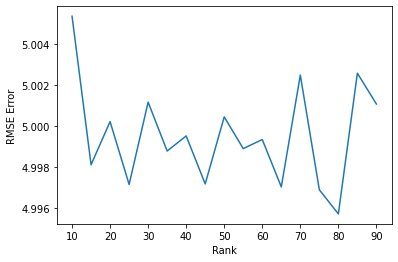

In [ ]:
## Plotting rmse error vs rank of PQ matrix
plt.plot(ranks,test_rmse)
plt.ylabel('RMSE Error')
plt.xlabel('Rank')

In [ ]:
## The various test rmse errors
print(test_rmse)

[5.0053343910537205, 4.998108515564616, 5.0002067435061965, 4.997150345059948, 5.00115256688391, 4.998775721825656, 4.999511091438952, 4.997174775245468, 5.000436708279551, 4.99889351670127, 4.999334265580771, 4.997030565846134, 5.002470166546254, 4.996889870285829, 4.995714937117593, 5.002560543955119, 5.001063499349671]
